In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
primary_df = pd.read_csv('Data\Avaluaci__de_sis__d_educaci__prim_ria.csv')
secondary_df = pd.read_csv('Data\Avaluaci__de_quart_d_Educaci__Secund_ria_Obligat_ria_20231112.csv')

In [3]:
def plot_corr_double(primary_df, secondary_df, fields_1,fields_2, title):
    correlations_1 = primary_df[fields_1].corr()
    correlations_2 = secondary_df[fields_2].corr()
    combined_correlations = np.zeros_like(correlations_1)
    combined_correlations[np.triu_indices_from(combined_correlations)] = correlations_1.values[np.triu_indices_from(correlations_1)]
    combined_correlations[np.tril_indices_from(combined_correlations, k=-1)] = correlations_2.values[np.tril_indices_from(correlations_2, k=-1)]
    print(correlations_1, '\n',  '\n',correlations_2)

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(np.arange(len(correlations_1.columns)+1)-0.5, np.arange(len(correlations_1.index)+1)-0.5, color='black', linewidth=2)
    im = ax.imshow(combined_correlations, cmap='cividis', vmin=0, vmax=1, interpolation='nearest')
    cbar = fig.colorbar(im, ax=ax, label='Correlation Coefficient', ticks=np.linspace(0, 1, 11))
    ax.set_title(title)
    ax.set_xticks(range(len(combined_correlations)),labels = fields_2, rotation = 90)
    ax.set_yticks(range(len(combined_correlations)),labels = fields_2, rotation = 0)
    ax.xaxis.tick_top()
    ax.set_xlabel('4th Grade of ESO')
    ax.set_ylabel('6th Grade of primary')
    ax.yaxis.set_label_position('right')
    plt.tight_layout()

In [4]:
def plot_corr_single(df, fields, title):
    correlations = df[fields].corr()
    print(correlations)

    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(combined_correlations, cmap='viridis', vmin=0, vmax=1, interpolation='nearest')
    cbar = fig.colorbar(im, ax=ax, label='Correlation Coefficient', ticks=np.linspace(0, 1, 11))
    ax.set_title(title)
    ax.set_xticks(range(len(correlations)),labels = fields, rotation = 90)
    ax.set_yticks(range(len(correlations)),labels = fields, rotation = 0)
    plt.tight_layout()

In [5]:
def plot_averages_double(primary_df,secondary_df,fields_1,fields_2,title):
    with plt.style.context(("tableau-colorblind10",)):
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.scatter(np.arange(len(fields_2))-0.1, primary_df[fields_1].mean(), label = "6th Grade of Primary", zorder = 2)
        ax.scatter(np.arange(len(fields_2))+0.1, secondary_df[fields_2].mean(), label = "4th Grade of ESO", zorder =2)
        ax.errorbar(np.arange(len(fields_2))-0.1, primary_df[fields_1].mean(), yerr=primary_df[fields_1].std(), fmt='none', color = 'black', linewidth = 1, zorder = 1, capsize = 5)
        ax.errorbar(np.arange(len(fields_2))+0.1, secondary_df[fields_2].mean(), yerr=secondary_df[fields_2].std(), fmt='none', color = 'black', linewidth = 1, zorder =1, capsize = 5)
        ax.set_xticks(np.arange(len(fields_2)))
        ax.set_xticklabels(fields_2)
        ax.yaxis.grid(True)
        ax.legend()
        plt.tight_layout()

           PCAT     PCAST      PMAT      PANG     PFRAN      PMED
PCAT   1.000000  0.772289  0.639557  0.674851  0.594041  0.694708
PCAST  0.772289  1.000000  0.613168  0.645921  0.566651  0.677703
PMAT   0.639557  0.613168  1.000000  0.560228  0.463919  0.624324
PANG   0.674851  0.645921  0.560228  1.000000  0.639197  0.593863
PFRAN  0.594041  0.566651  0.463919  0.639197  1.000000  0.561277
PMED   0.694708  0.677703  0.624324  0.593863  0.561277  1.000000 
 
            PCAT     PCAST      PMAT      PANG     PFRAN     PCIEN
PCAT   1.000000  0.678932  0.571711  0.627288  0.673904  0.519466
PCAST  0.678932  1.000000  0.575535  0.642147  0.666858  0.546948
PMAT   0.571711  0.575535  1.000000  0.626064  0.610434  0.685661
PANG   0.627288  0.642147  0.626064  1.000000  0.172836  0.630455
PFRAN  0.673904  0.666858  0.610434  0.172836  1.000000  0.631073
PCIEN  0.519466  0.546948  0.685661  0.630455  0.631073  1.000000


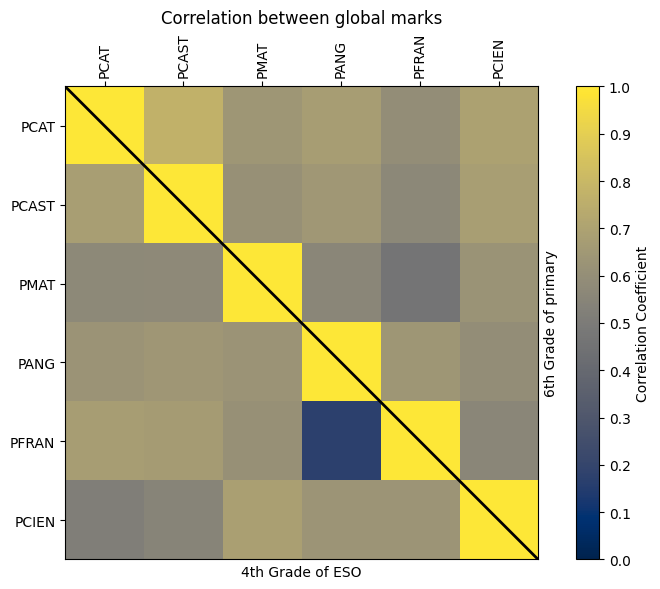

In [6]:
common_subjects = []
for element in primary_df.columns.values:
    if element in secondary_df and element[0]=='P' and '_' not in element:
        common_subjects.append(element)

fields_1 = list(common_subjects)
fields_2 = list(common_subjects)
fields_1.append('PMED')
fields_2.append('PCIEN')

secondary_df= secondary_df[fields_2].replace(1,np.nan)

title = 'Correlation between global marks'

plot_corr_double(primary_df, secondary_df, fields_1,fields_2, title)

Grades correlations between all three languages are positive, with a strongest correlation between catalan and spanish. The correlation for all trhee language pairs is higher at 6th grade of primary school than in 4th grade of secondary school.
There is a positive correlation between math and sciences which is moderately stronger at 4th grade of ESO.
Very low correlation beetween French and English at 4th of ESO.

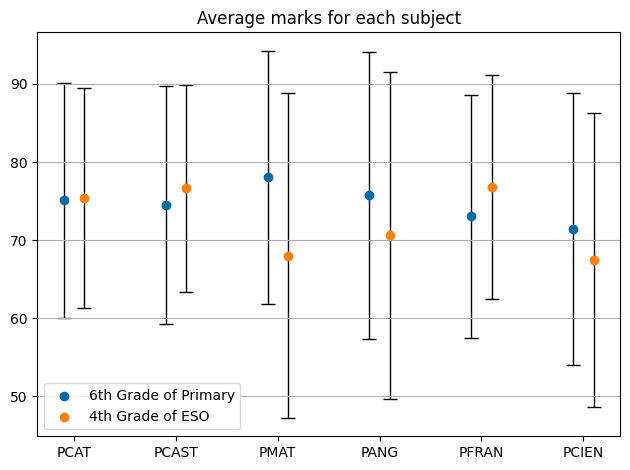

In [7]:
title = 'Average marks for each subject'
plot_averages_double(primary_df, secondary_df, fields_1, fields_2, title)